In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.TabTransformer import TabTransformer

In [4]:
model = TabTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="classification"
    )

In [9]:
model.input_dict

{'sex': {'data_type': dtype('O'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sex')>])},
 'age': {'data_type': dtype('float64'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>])},
 'n_siblings_spouses': {'data_type': dtype('int64'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>])},
 'parch': {'data_type': dtype('int64'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>])},
 'fare': {'data_type': dtype('float64'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>])},
 'class': {'data_type': dtype('O'),
  'Network': None,
  'Input': ListWrapper([<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'class')>])},
 'deck': {'data_type': dtype('O'),

In [8]:
next(iter(model.training_dataset))[0]["age"]

<tf.Tensor: shape=(502, 1), dtype=float32, numpy=
array([[ 0.8693678 ],
       [ 3.3090096 ],
       [ 0.18946758],
       [ 1.3093032 ],
       [ 0.9093619 ],
       [-0.6904033 ],
       [-0.37045023],
       [-0.37045023],
       [-0.13048546],
       [ 1.7892327 ],
       [ 1.7092445 ],
       [-0.13048546],
       [-0.610415  ],
       [-0.4504385 ],
       [-0.13048546],
       [ 0.82937366],
       [ 0.82937366],
       [ 0.50942063],
       [-0.13048546],
       [ 1.7892327 ],
       [-0.93036807],
       [ 2.3491507 ],
       [ 0.26945585],
       [-0.6904033 ],
       [-0.610415  ],
       [-0.29046196],
       [ 0.6693971 ],
       [ 0.82937366],
       [-0.13048546],
       [-0.13048546],
       [-0.610415  ],
       [-2.0502036 ],
       [-1.1703328 ],
       [-0.0504972 ],
       [ 1.3093032 ],
       [-0.0504972 ],
       [-0.0504972 ],
       [-0.13048546],
       [-0.13048546],
       [-0.13048546],
       [-0.4504385 ],
       [ 1.2293149 ],
       [-1.1703328 ],
    

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
model.fit(model.training_dataset, epochs=100, validation_data=model.validation_dataset)



Epoch 1/100


1/1 [==============================] - 12s 12s/step - loss: 3.5705 - accuracy: 0.5139 - val_loss: 2.9282 - val_accuracy: 0.5200
Epoch 2/100
1/1 [==============================] - 0s 215ms/step - loss: 3.4760 - accuracy: 0.5199 - val_loss: 3.1322 - val_accuracy: 0.6000
Epoch 3/100
1/1 [==============================] - 0s 200ms/step - loss: 3.2323 - accuracy: 0.6076 - val_loss: 2.4489 - val_accuracy: 0.7040
Epoch 4/100
1/1 [==============================] - 0s 189ms/step - loss: 2.5632 - accuracy: 0.6873 - val_loss: 3.2034 - val_accuracy: 0.7360
Epoch 5/100
1/1 [==============================] - 0s 202ms/step - loss: 2.4109 - accuracy: 0.7371 - val_loss: 2.8081 - val_accuracy: 0.7760
Epoch 6/100
1/1 [==============================] - 0s 207ms/step - loss: 2.5286 - accuracy: 0.7550 - val_loss: 2.0522 - val_accuracy: 0.8480
Epoch 7/100
1/1 [==============================] - 0s 202ms/step - loss: 2.2879 - accuracy: 0.7629 - val_loss: 2.3351 - val_accuracy: 0.8080
Epoch 8/100
1/1 [=========

In [7]:
model.summary()

Model: "tab_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_transformer_encoder (T  multiple                  144008    
 abTransformerEncoder)                                           
                                                                 
 sequential_4 (Sequential)   (None, 40)                16440     
                                                                 
 dense_10 (Dense)            multiple                  41        
                                                                 
Total params: 160489 (626.91 KB)
Trainable params: 160489 (626.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 1s 836ms/step


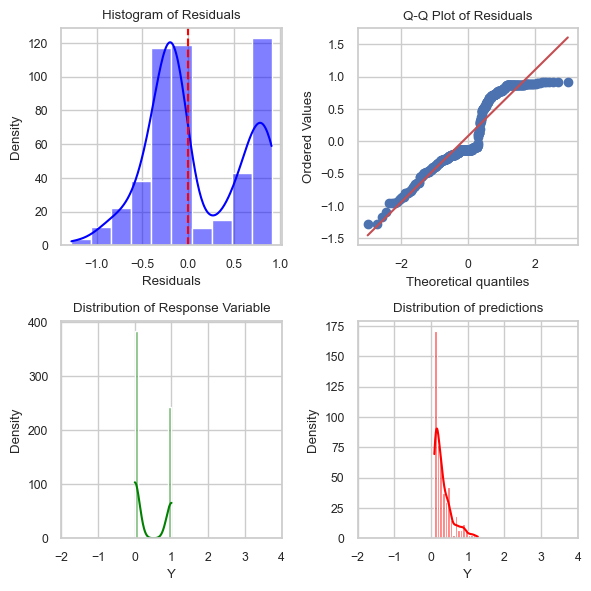

In [8]:
model.analytics_plot()

In [9]:
class Parent:
    def __init__(self, task="regression"):
        self.task = task

class Child(Parent):
    def __init__(self, child_property, task="classification"):
        super().__init__(task=task)
        self.child_property = child_property